# KNN on Glass data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [43]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

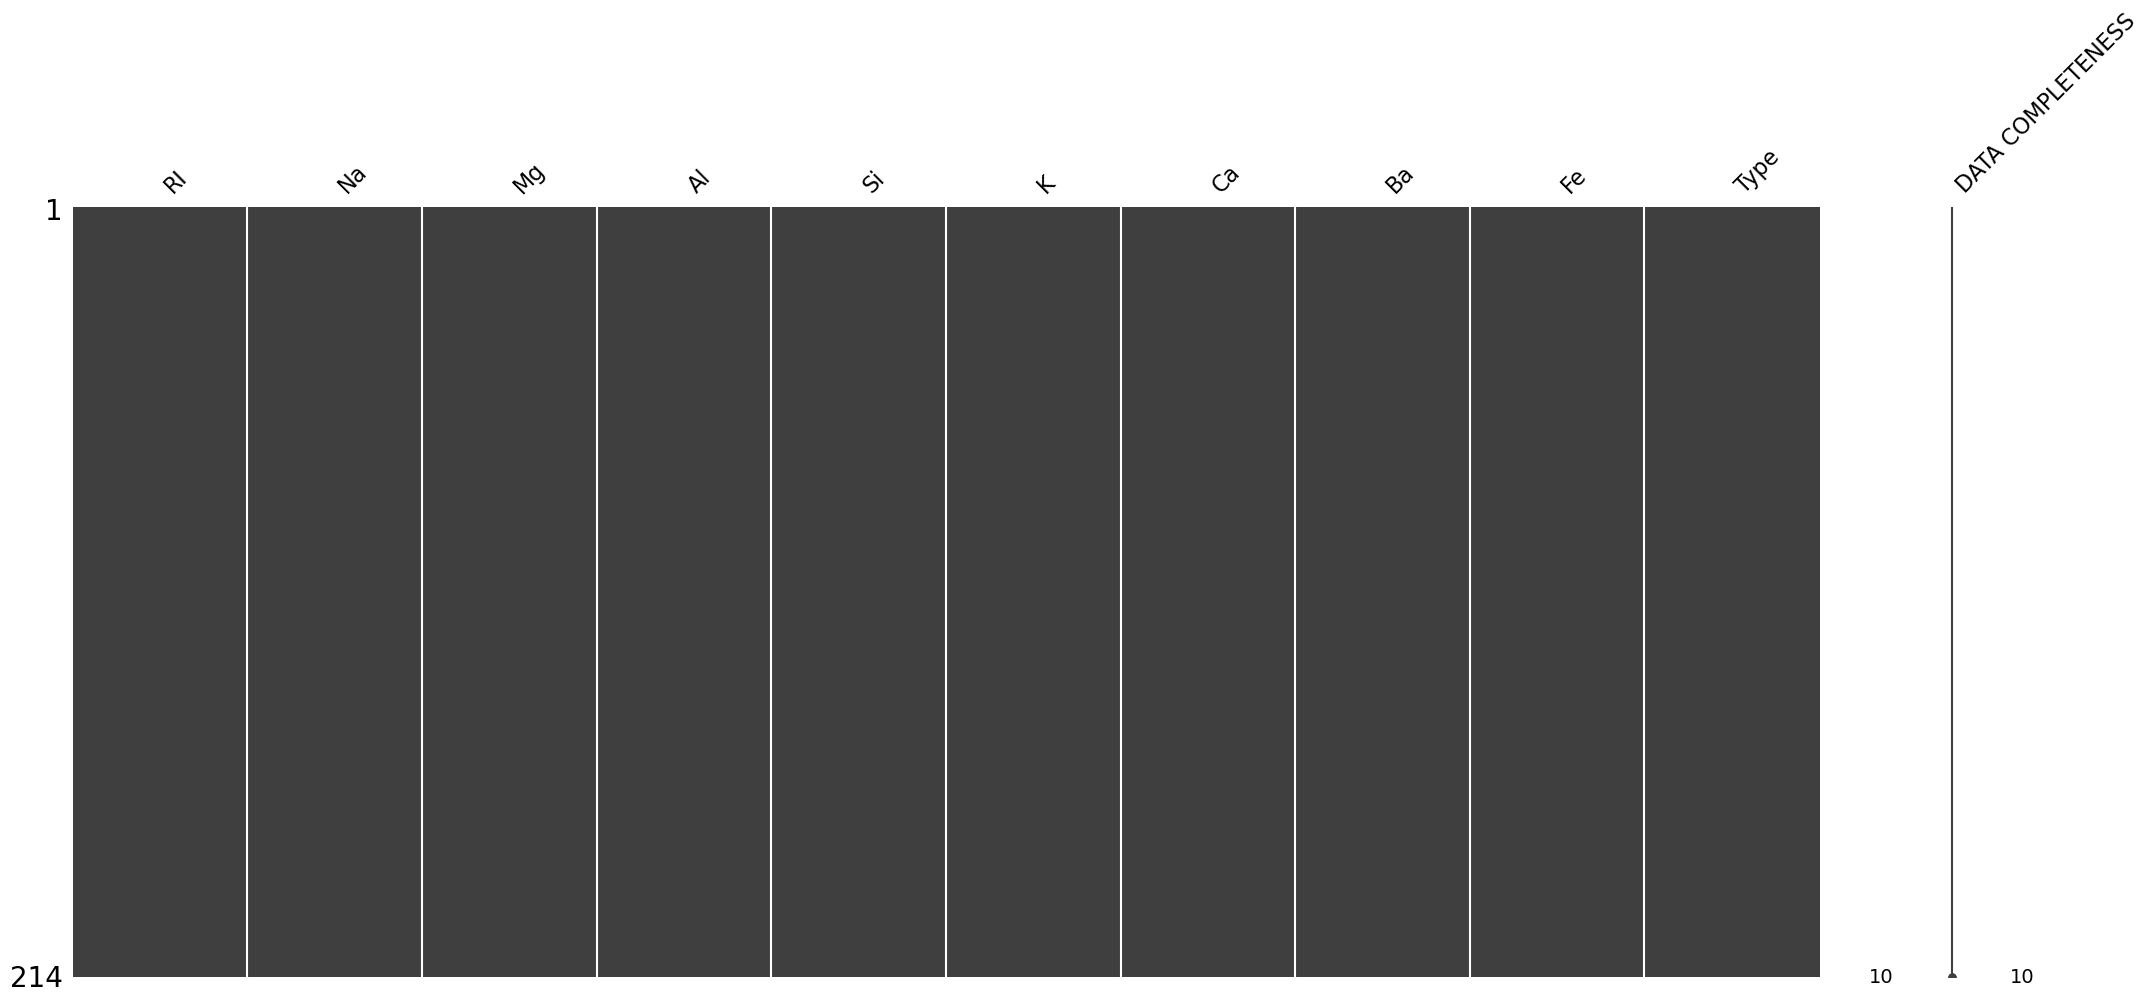

In [7]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


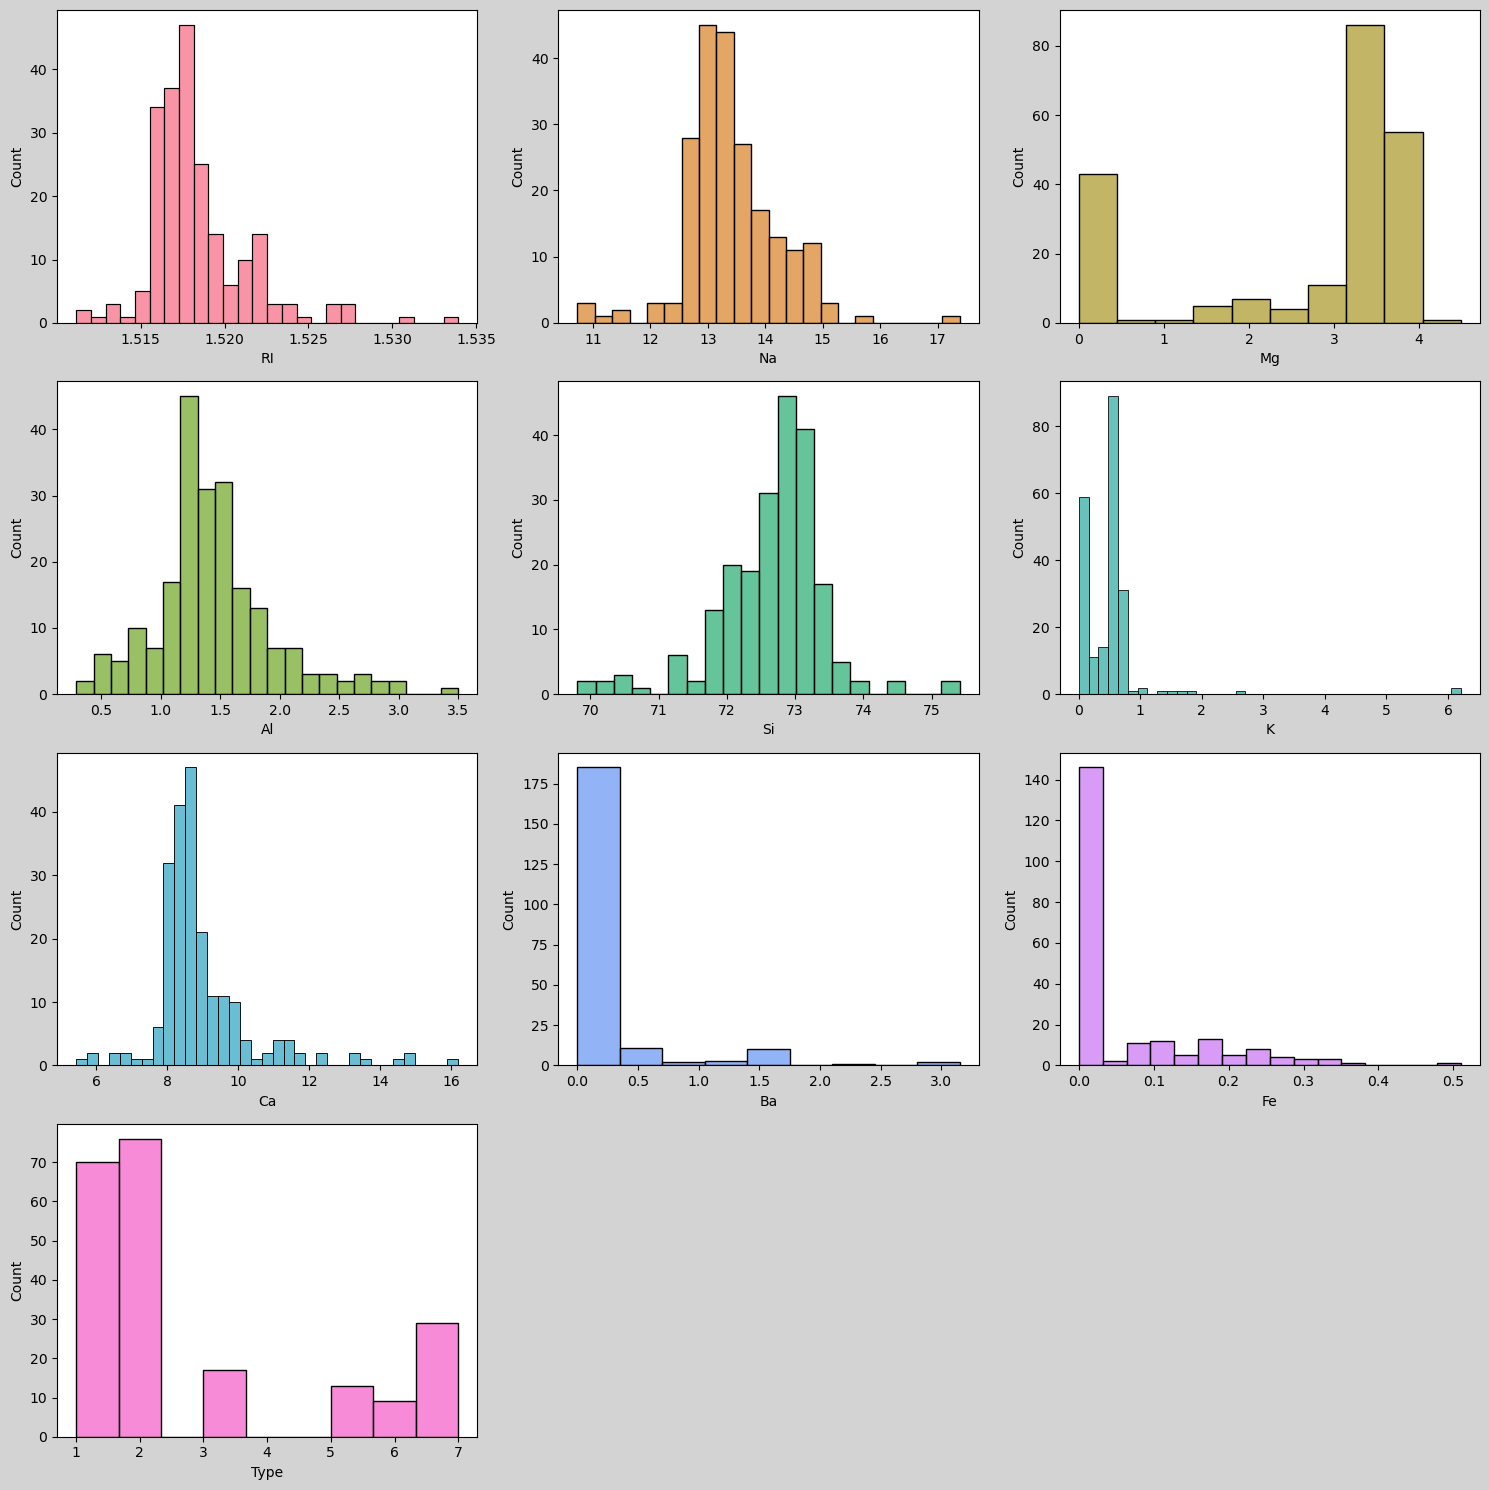

In [9]:
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

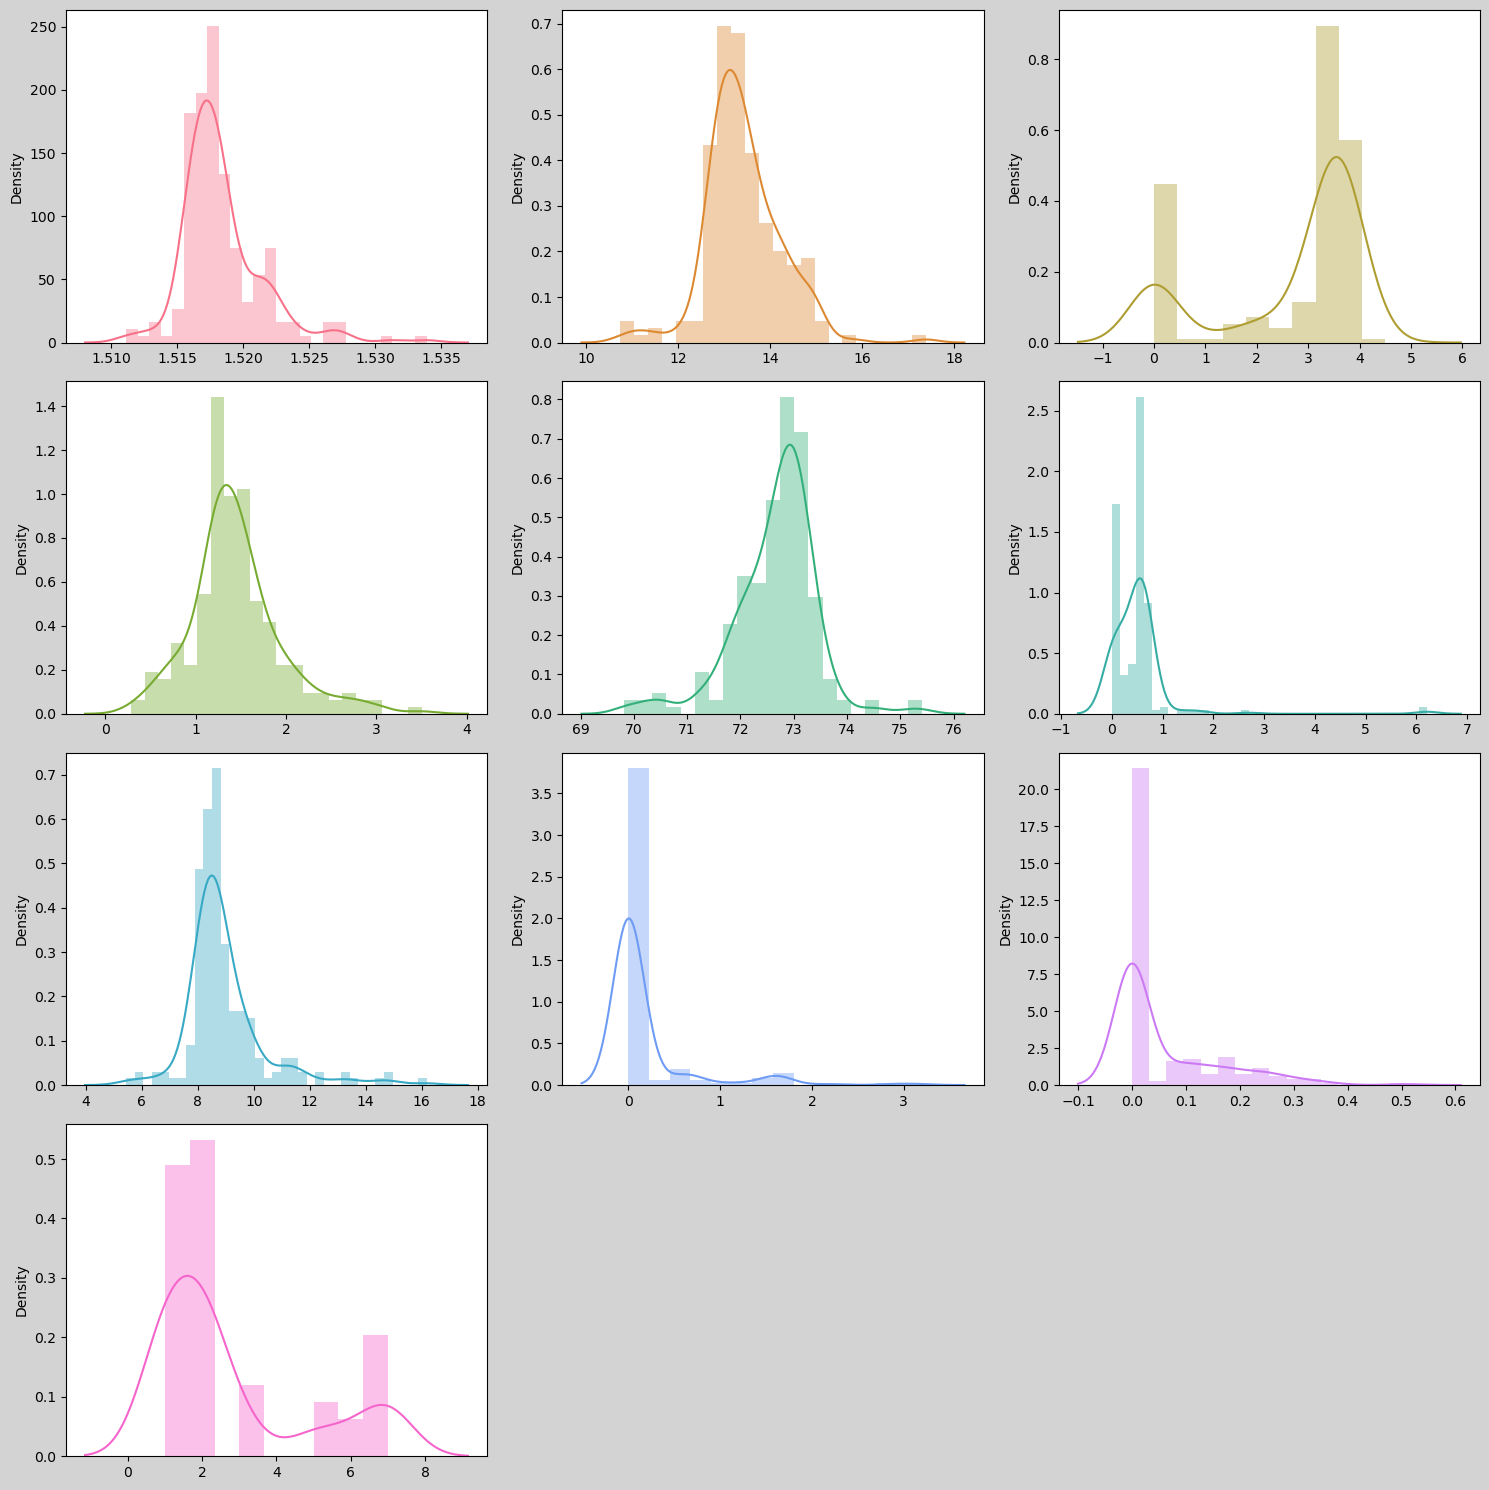

In [11]:
import warnings
warnings.filterwarnings('ignore')
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

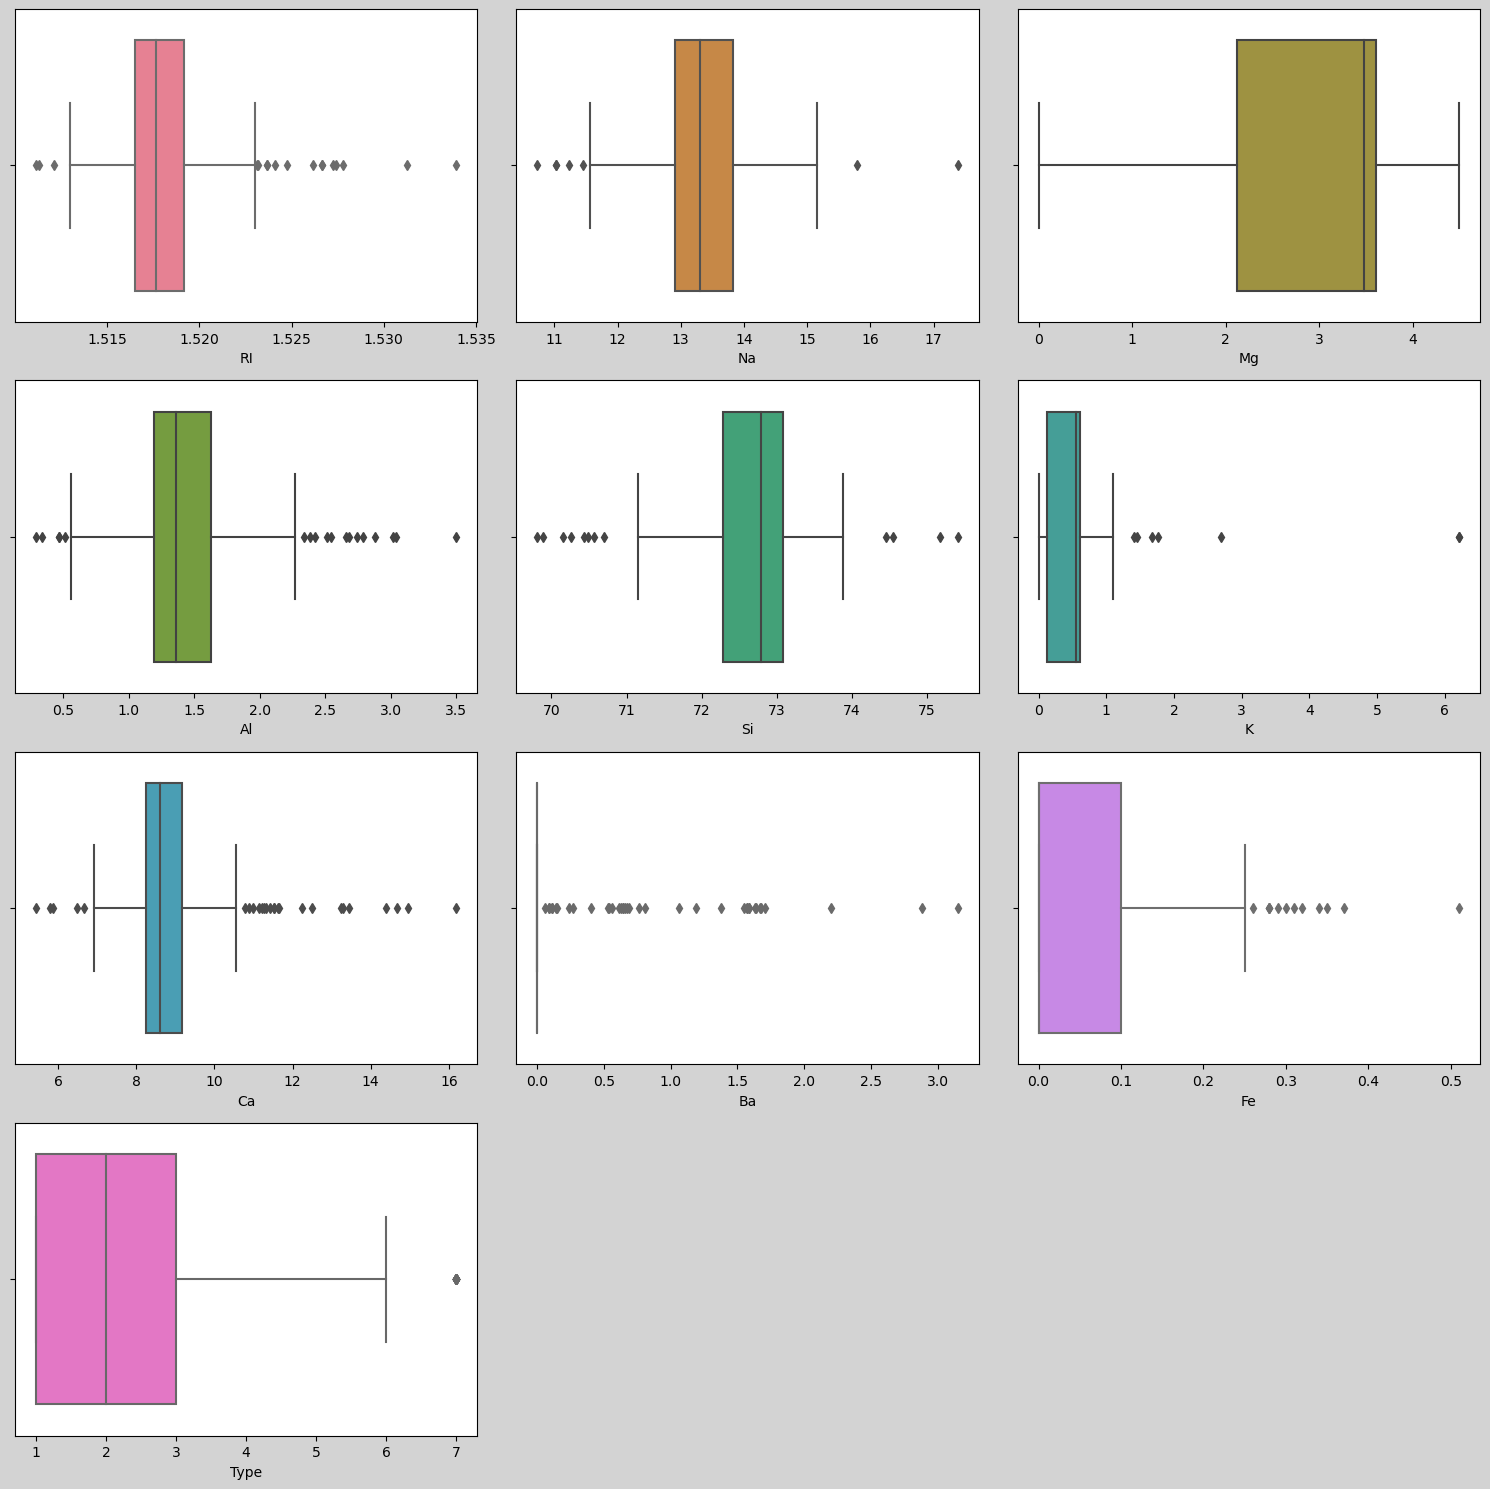

In [12]:
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


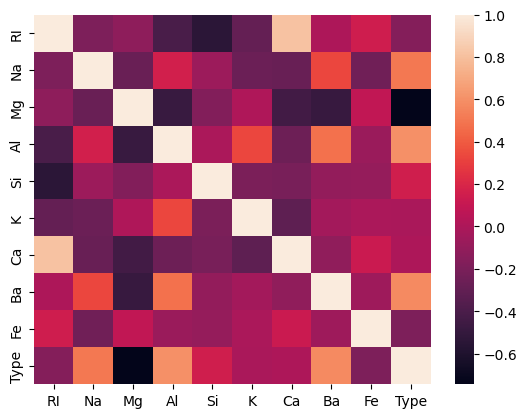

In [13]:
sns.heatmap(df.corr())
df.corr()

In [14]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

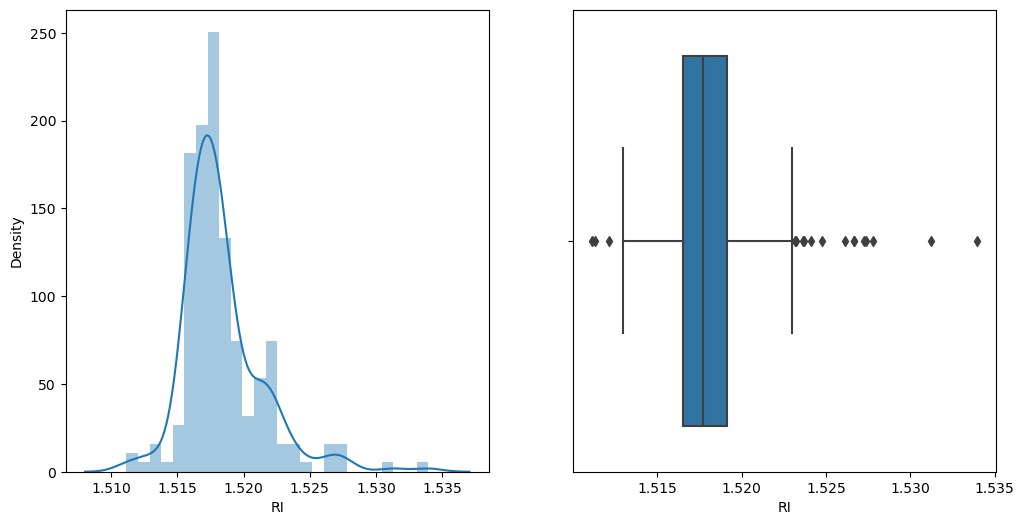

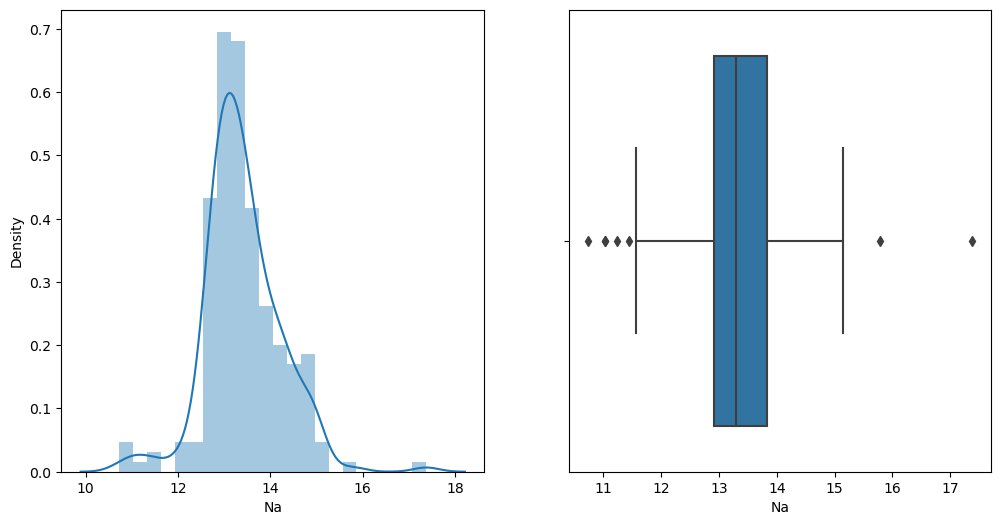

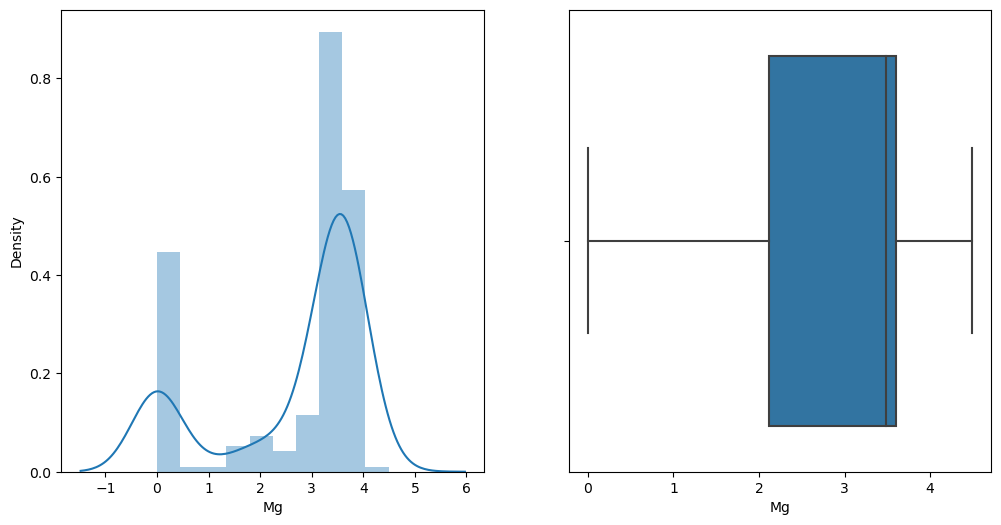

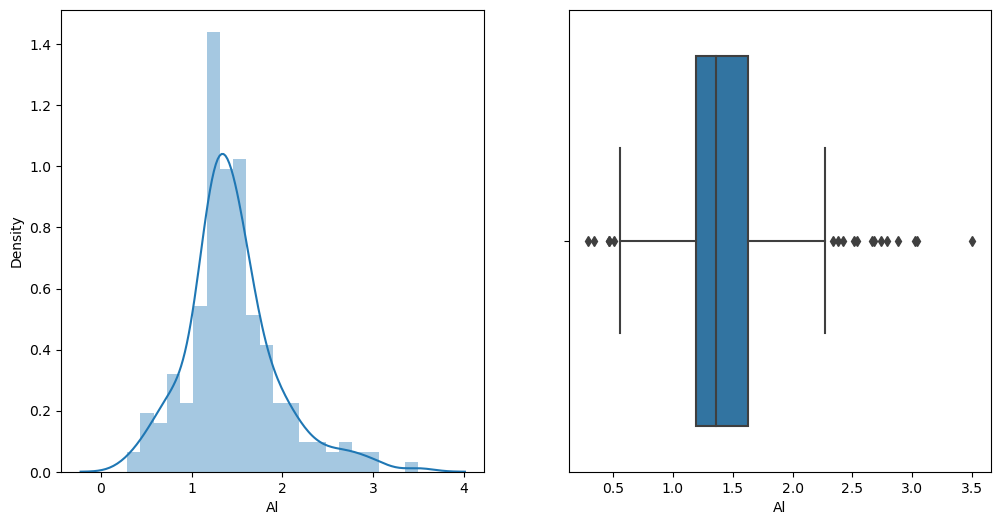

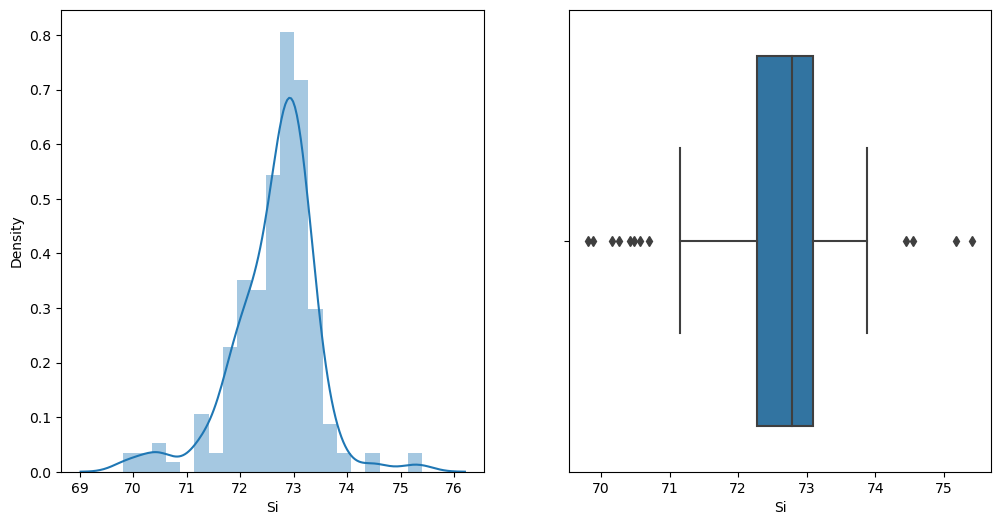

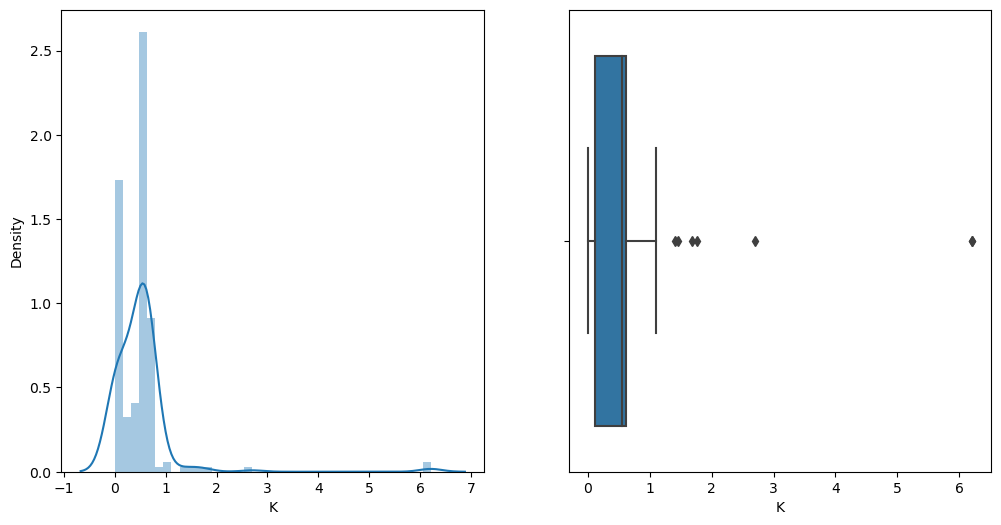

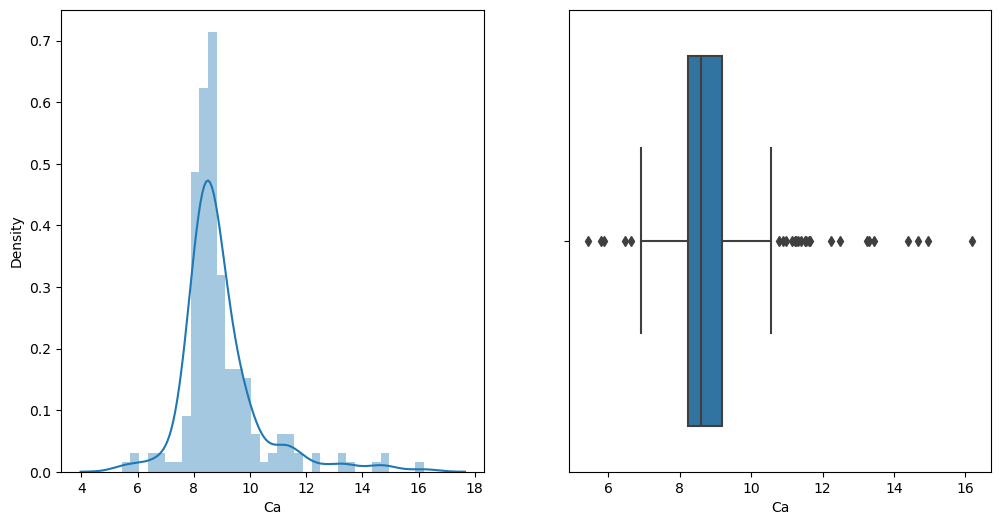

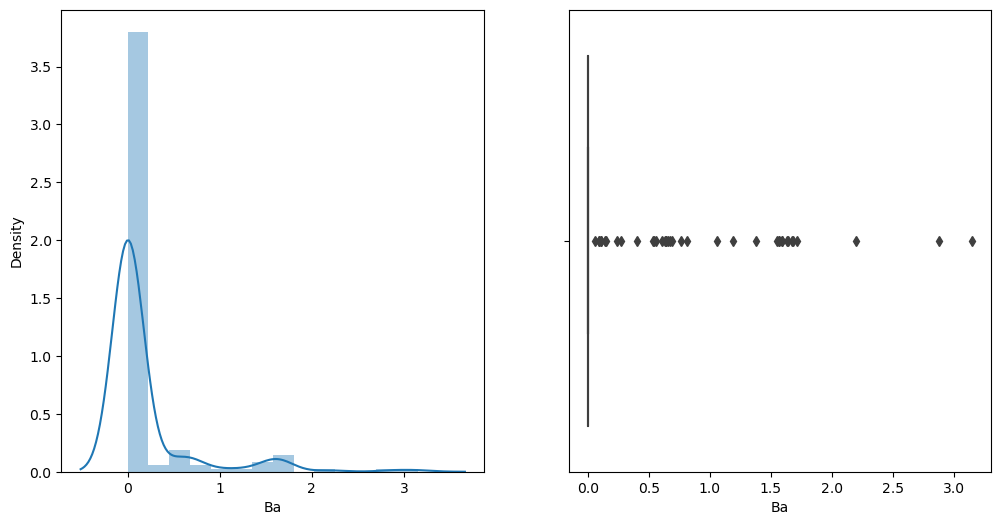

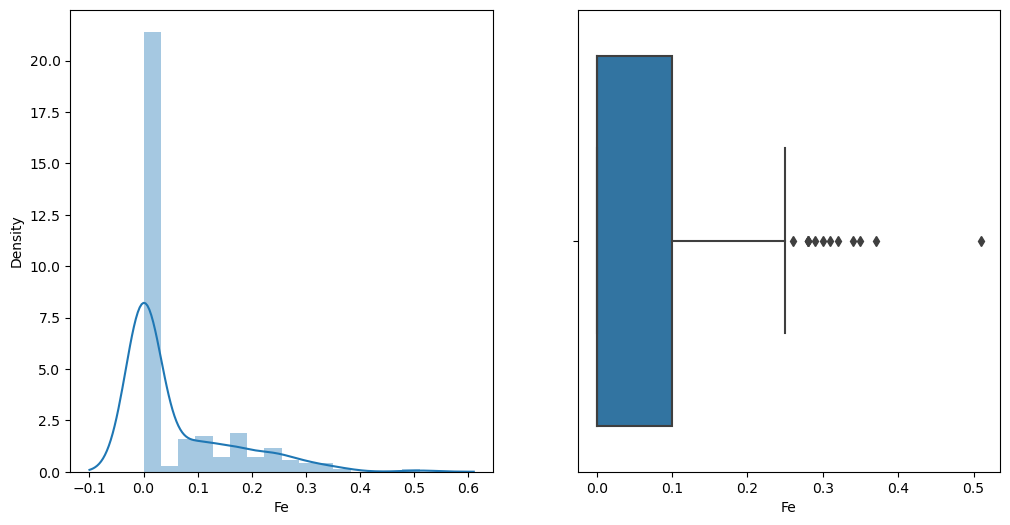

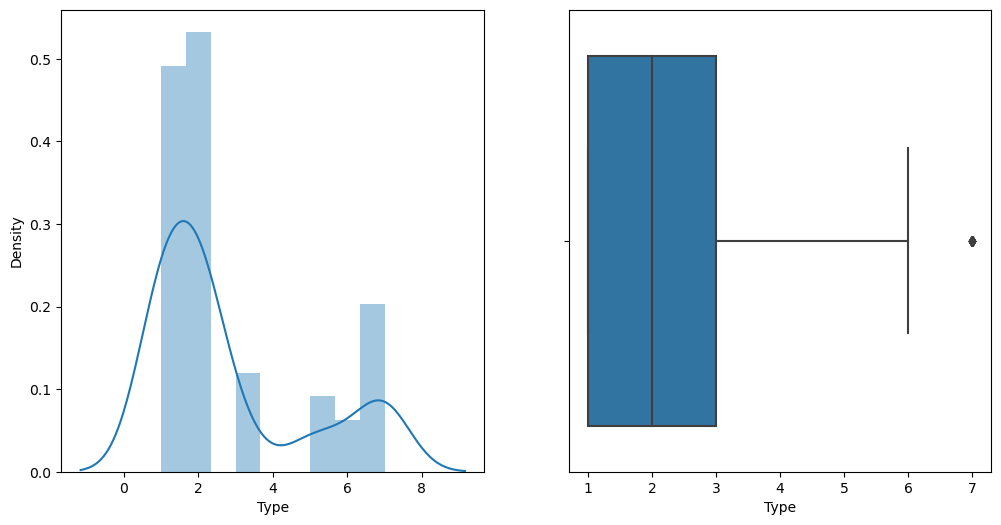

In [15]:
for col in df.columns:
    plt.figure(figsize=(12,6))
    
    plt.subplot(121)
    sns.distplot(df[col],label='skewness:'+ str(np.round(df[col].skew(),2)))
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout

From boxplot I would conclude that all the feature contains so many outliers so to get better accuracy it should be treated

In [16]:
#ok lets treat the oulier i am using iqr method
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    

In [25]:
treatoutlier(df,df.iloc[:,:-1].columns)

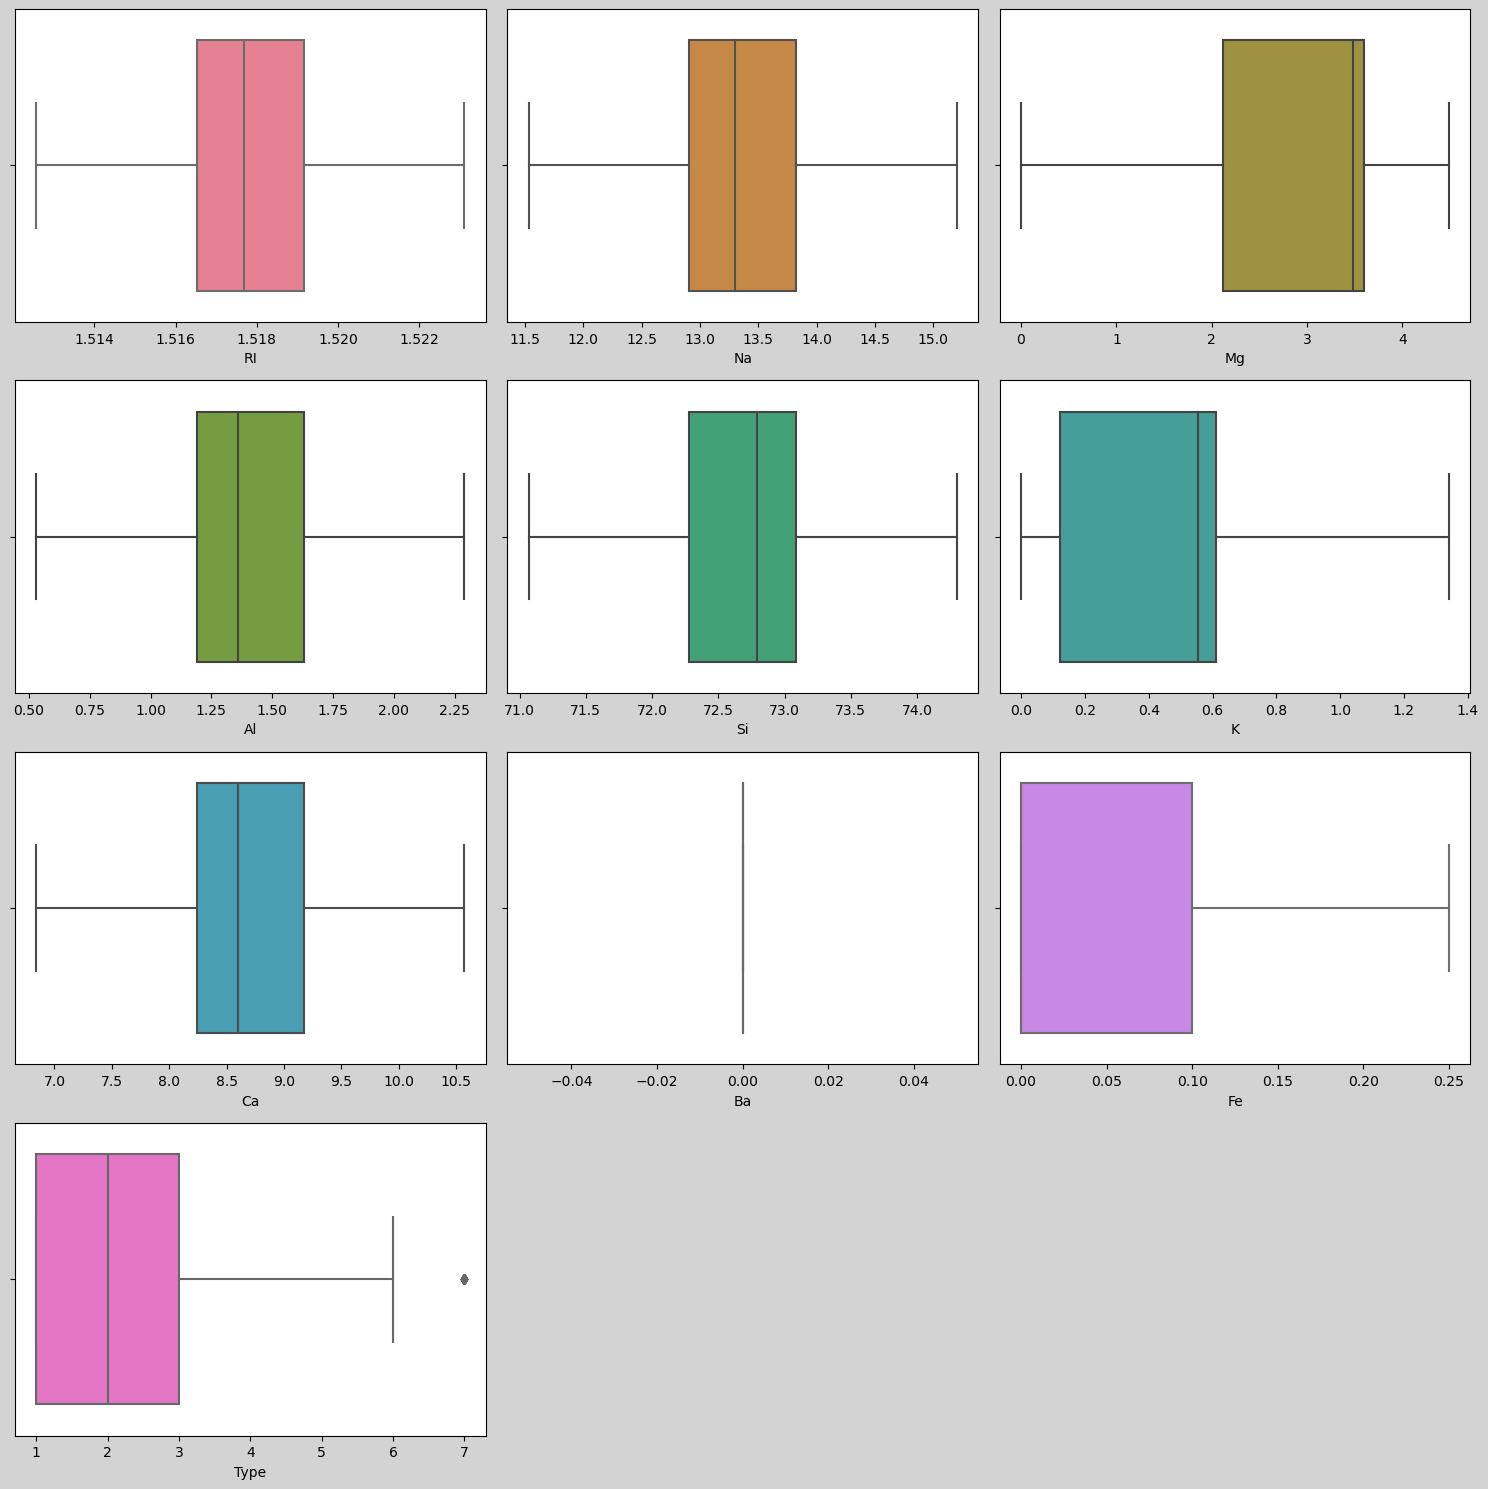

In [27]:
#see here i have treated the outliers by using iqr method

c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

In [44]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


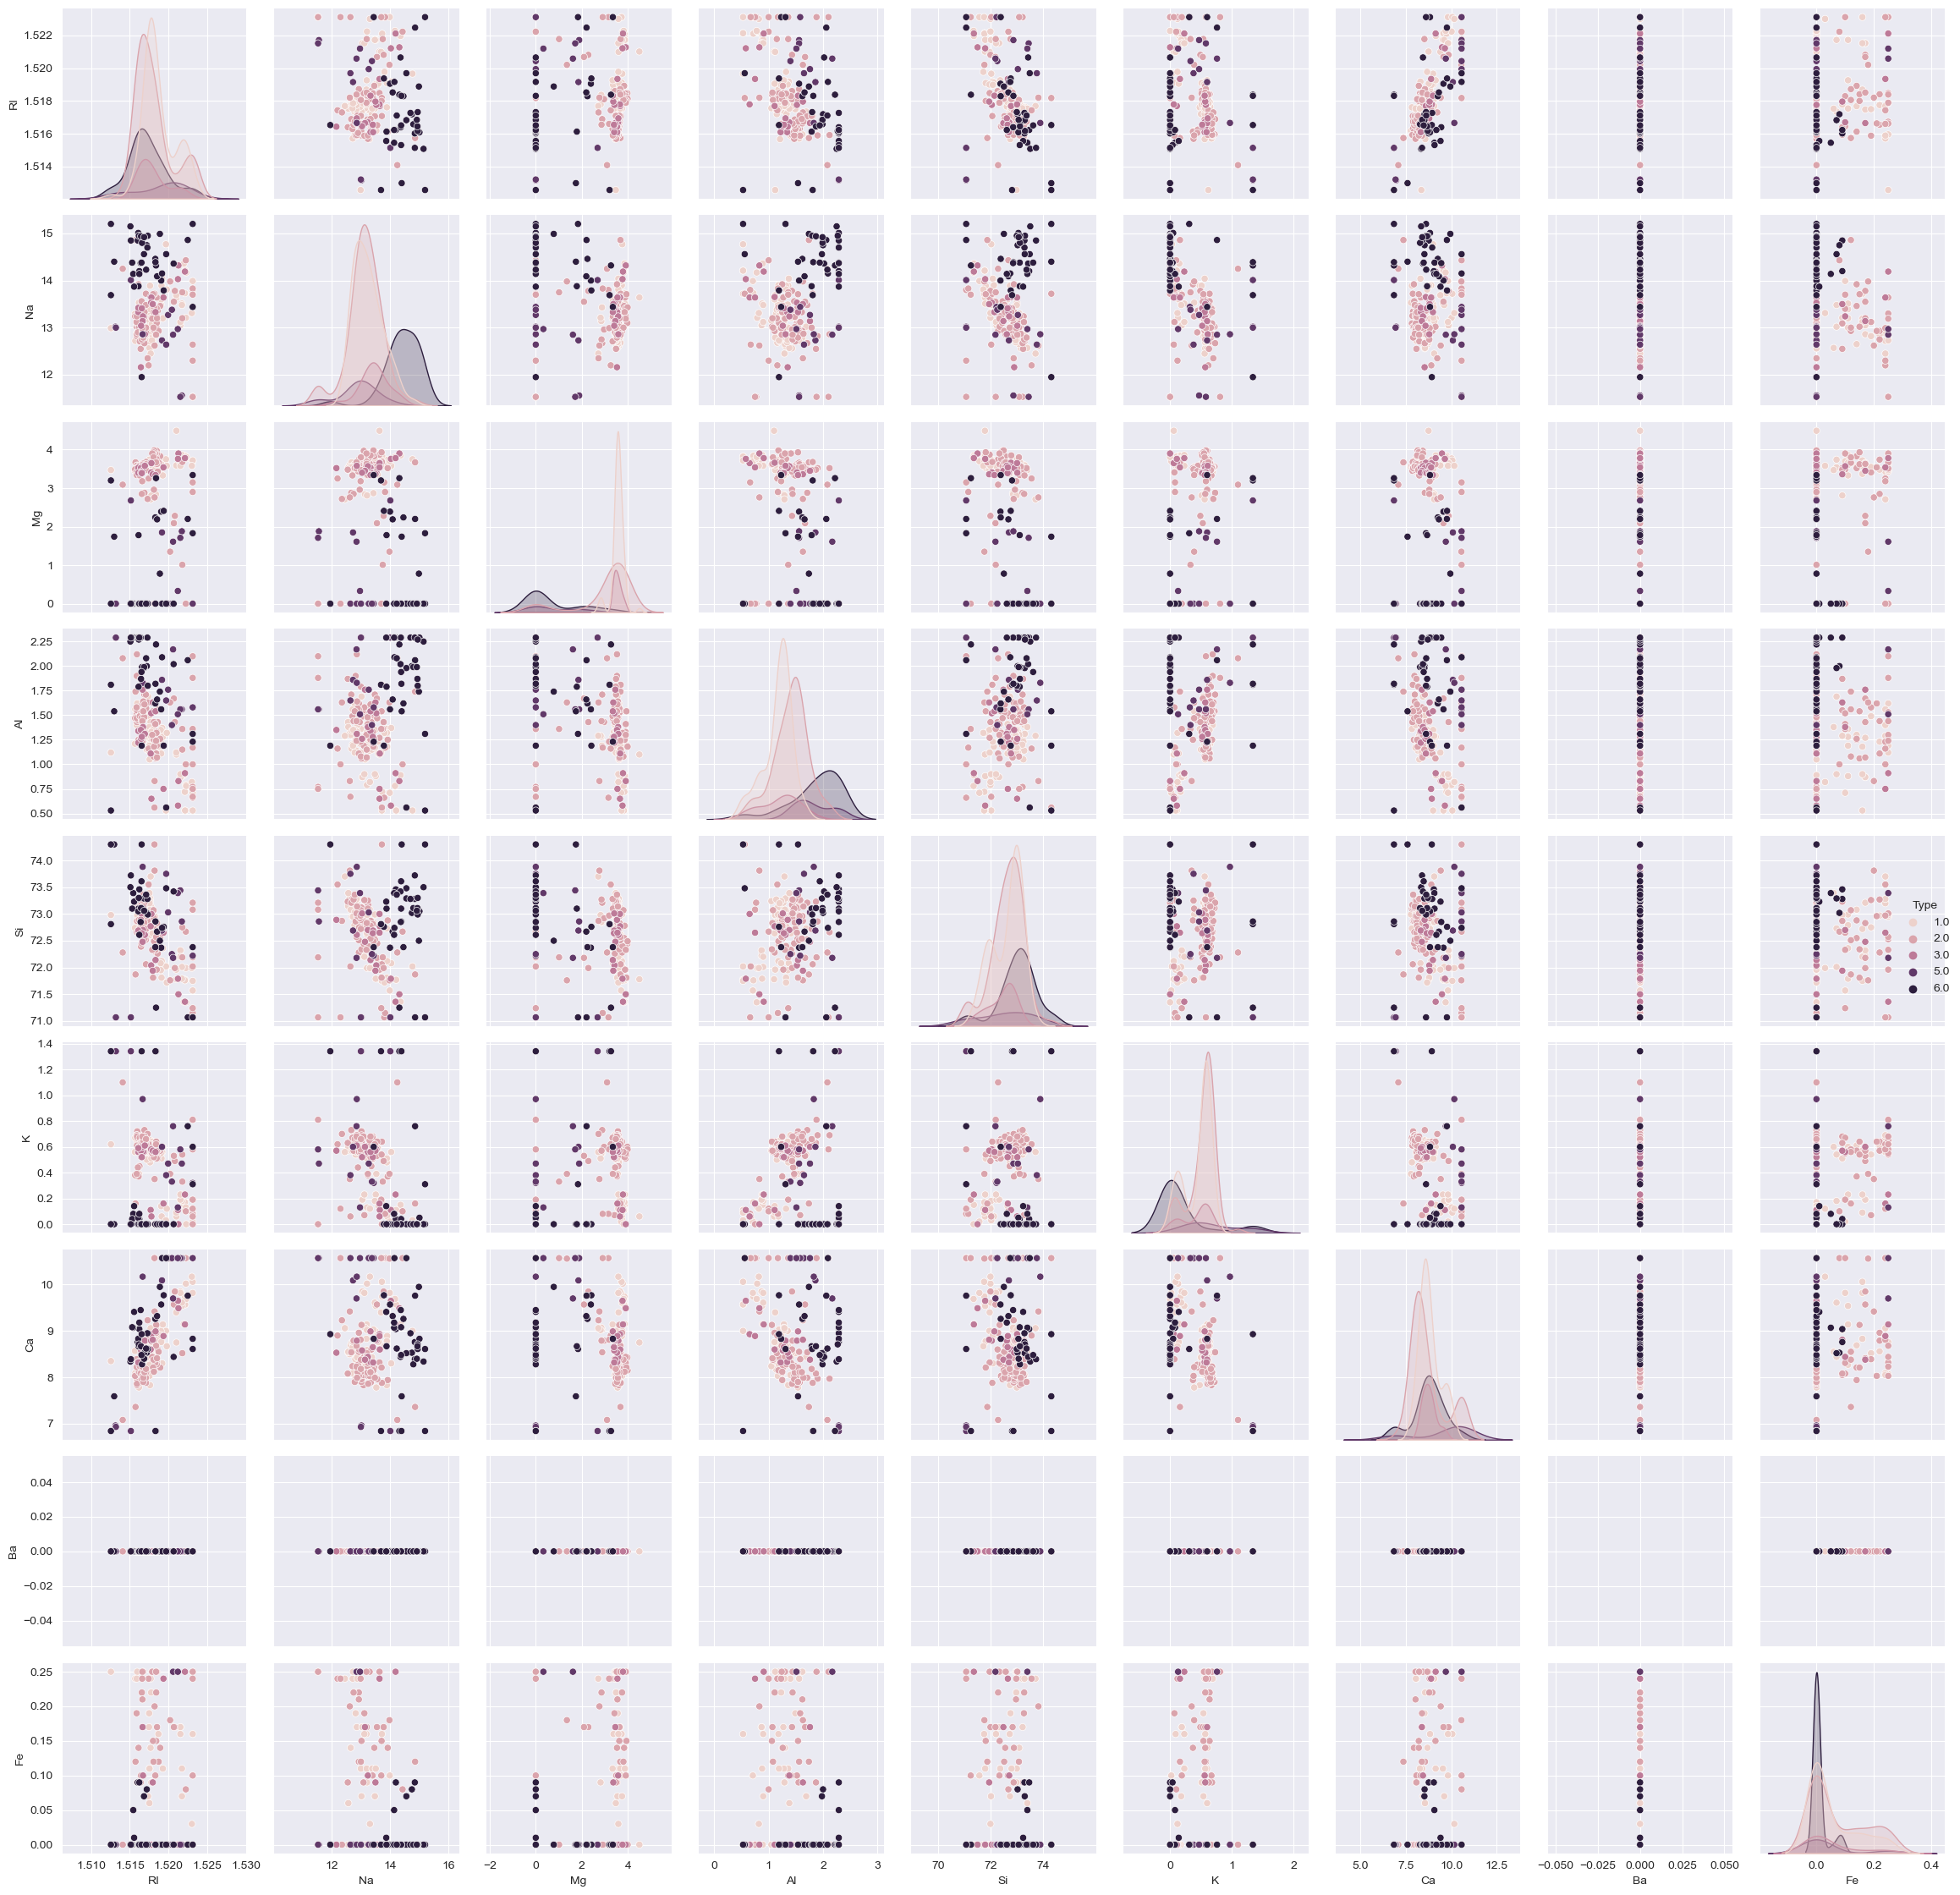

In [18]:
#Now lets plot the pairplot to find the corelation of all the variable

plt.figure(figsize=(20,10))
plt.close()
sns.set_style('darkgrid')
sns.pairplot(df,hue='Type')
plt.tight_layout()


In [54]:
from sklearn.preprocessing import RobustScaler
scale=RobustScaler().fit_transform(df.iloc[:,:-1])
x=scale
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [55]:
model=KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)

In [56]:
import warnings
warnings.filterwarnings('ignore')
prdct=model.predict(X_test)
print('test accuracy of the model',accuracy_score(y_test,prdct))

test accuracy of the model 0.6923076923076923


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prdct))

              precision    recall  f1-score   support

           1       0.56      0.95      0.71        19
           2       0.78      0.61      0.68        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       0.67      0.67      0.67         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.61      0.58      0.57        65
weighted avg       0.69      0.69      0.67        65



In [59]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# over Sampling using SMOTE 

In [60]:
#data balancing should be done because data's are not distributed properly
#let me use oversampling techniques
from imblearn.over_sampling import SMOTE


# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution
pd.Series(y_resampled).value_counts()

2    53
1    53
6    53
5    53
3    53
7    53
Name: Type, dtype: int64

In [63]:
model=KNeighborsClassifier(n_neighbors=2).fit(X_resampled,y_resampled)

In [64]:
prdct=model.predict(X_test)
print('test accuracy of the model',accuracy_score(y_test,prdct))

test accuracy of the model 0.7076923076923077


In [65]:
print(classification_report(y_test,prdct))

              precision    recall  f1-score   support

           1       0.59      0.84      0.70        19
           2       0.87      0.57      0.68        23
           3       0.40      0.50      0.44         4
           5       0.80      0.67      0.73         6
           6       0.50      0.67      0.57         3
           7       1.00      0.90      0.95        10

    accuracy                           0.71        65
   macro avg       0.69      0.69      0.68        65
weighted avg       0.76      0.71      0.71        65



<AxesSubplot:>

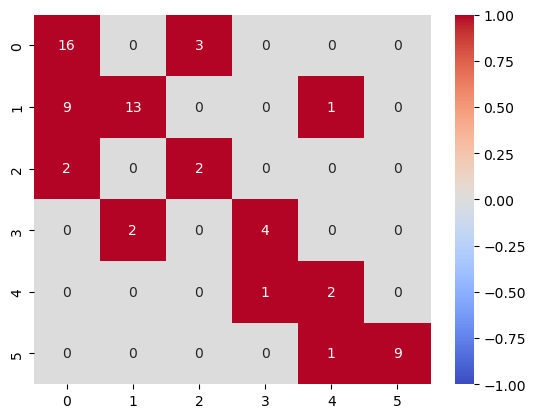

In [69]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
sns.heatmap(confusion_matrix(y_test,prdct), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')